# ESTIMATION OF OBESITY LEVELS BASED ON EATING HABITS AND PHYSICAL CONDITION

**GROUP 02 _ DATA103 S11**

Members:

* CHEN, Ysabelle Chloe T.
* DE SILVA, Wayne Flossien T.
* DEMAFELIX, Christienne Angelo D.

## INTRODUCTION

The study highlights obesity as a critical health issue affecting over 800 million people globally in 2022, with 27 million Filipinos impacted due to a variety of factors beyond just overeating, such as food and activity disparities and environmental, genetic, and emotional influences. By 2023, obesity is expected to afflict over 9 million Filipino adolescents, exacerbating the risk of severe health conditions. 

This project explores the impact of eating habits and physical conditions on obesity by employing machine learning models like K-Nearest Neighbors, SVM, and Logistic Regression. The specific objectives include using one-hot encoding for categorical data, comparing modeling methods, and establishing a correlation between BMI and obesity influencers to identify key intervention targets.

### IMPORTING LIBRARIES

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis

%matplotlib inline

### THE DATASET

The dataset was sourced from a data article entitled “Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico” published in 2019 by authors Fabio Mendoza Palechor and Alexis de la Hoz Manotas. In the article, the authors indicated that the dataset is intended to be used in building intelligent computational models and recommender systems that can aid in estimating the obesity level of an individual and in monitoring obesity levels.

In [36]:
df_obesity = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
df_obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The data was collected through an online survey on a website. The respondents were anonymous users from Mexico, Peru, and Colombia, aged between 14 and 61 years. The questions in the survey were related to the user's eating habits and physical conditions, as well as other variables such as height, weight, age, and gender. A total of 2111 records are in the dataset, with 16 features and 1 additional class label listed below:

In [37]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## EXPLORATORY DATA ANALYSIS (EDA)

In [70]:
# HANDLING MISSING VALUES (IF THERE ARE ANY)

total_nulls = df_obesity.isna().sum()
total_nulls

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### ANALYZING NUMERICAL FEATURES

In [76]:
# LIST OF COLUMNS WITH NUMERICAL DATA

float64_columns = df_obesity.select_dtypes(include=['float64']).columns
float64_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [73]:
# DESCRIPTIVE STATISTICS

df_obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


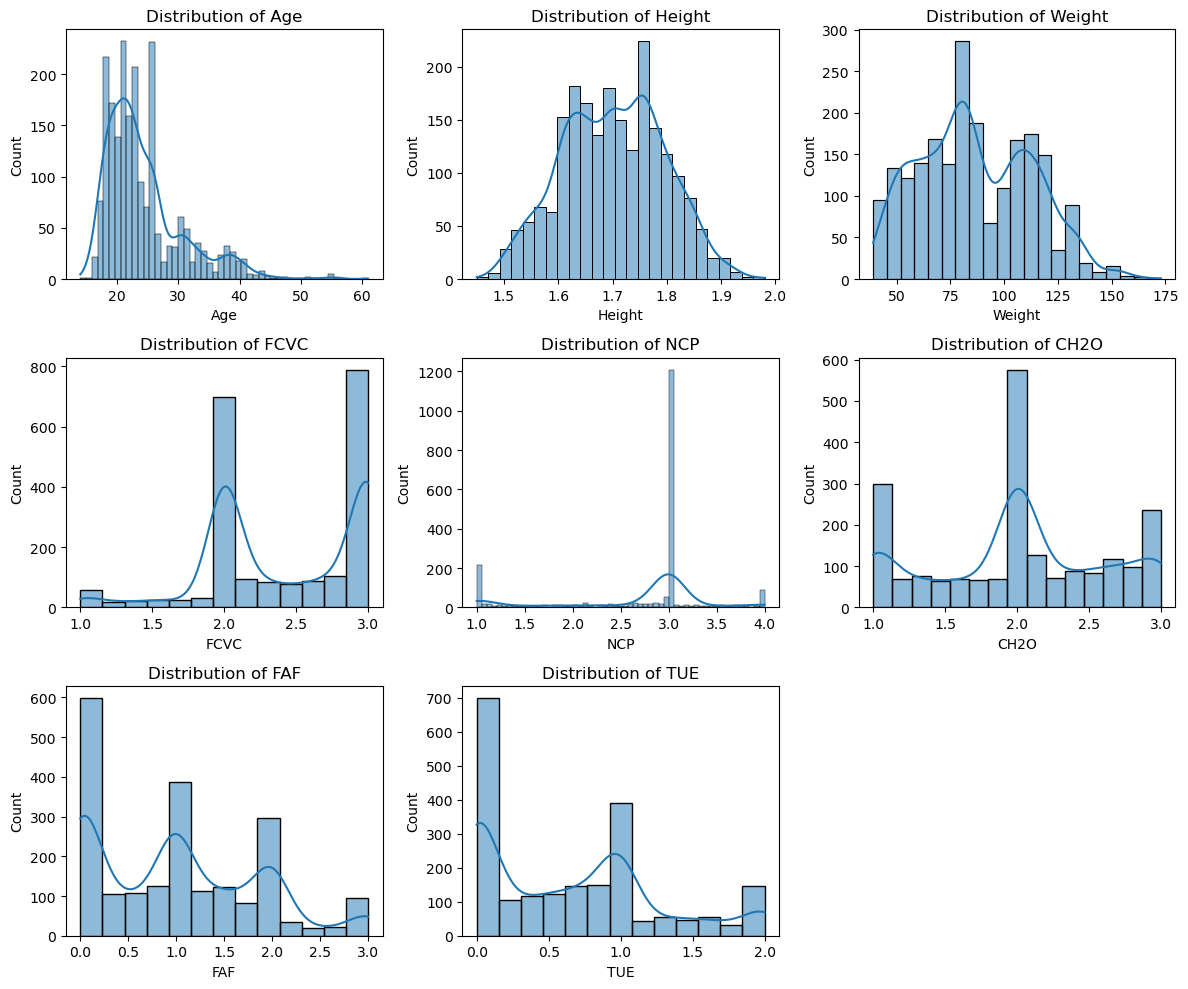

Age: Skewness = 1.53, Kurtosis = 2.82
Height: Skewness = -0.01, Kurtosis = -0.56
Weight: Skewness = 0.26, Kurtosis = -0.70
FCVC: Skewness = -0.43, Kurtosis = -0.64
NCP: Skewness = -1.11, Kurtosis = 0.38
CH2O: Skewness = -0.10, Kurtosis = -0.88
FAF: Skewness = 0.50, Kurtosis = -0.62
TUE: Skewness = 0.62, Kurtosis = -0.55


In [74]:
# PLOTTING HISTOGRAMS FOR NUMERICAL COLUMNS

plt.figure(figsize=(12, 10))
for i, col in enumerate(float64_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_obesity[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# CALCULATION OF SKEWNESS AND KURTOSIS

for col in float64_columns:
    print(f'{col}: Skewness = {skew(df_obesity[col]):.2f}, Kurtosis = {kurtosis(df_obesity[col]):.2f}')


#### INSIGHTS

Text

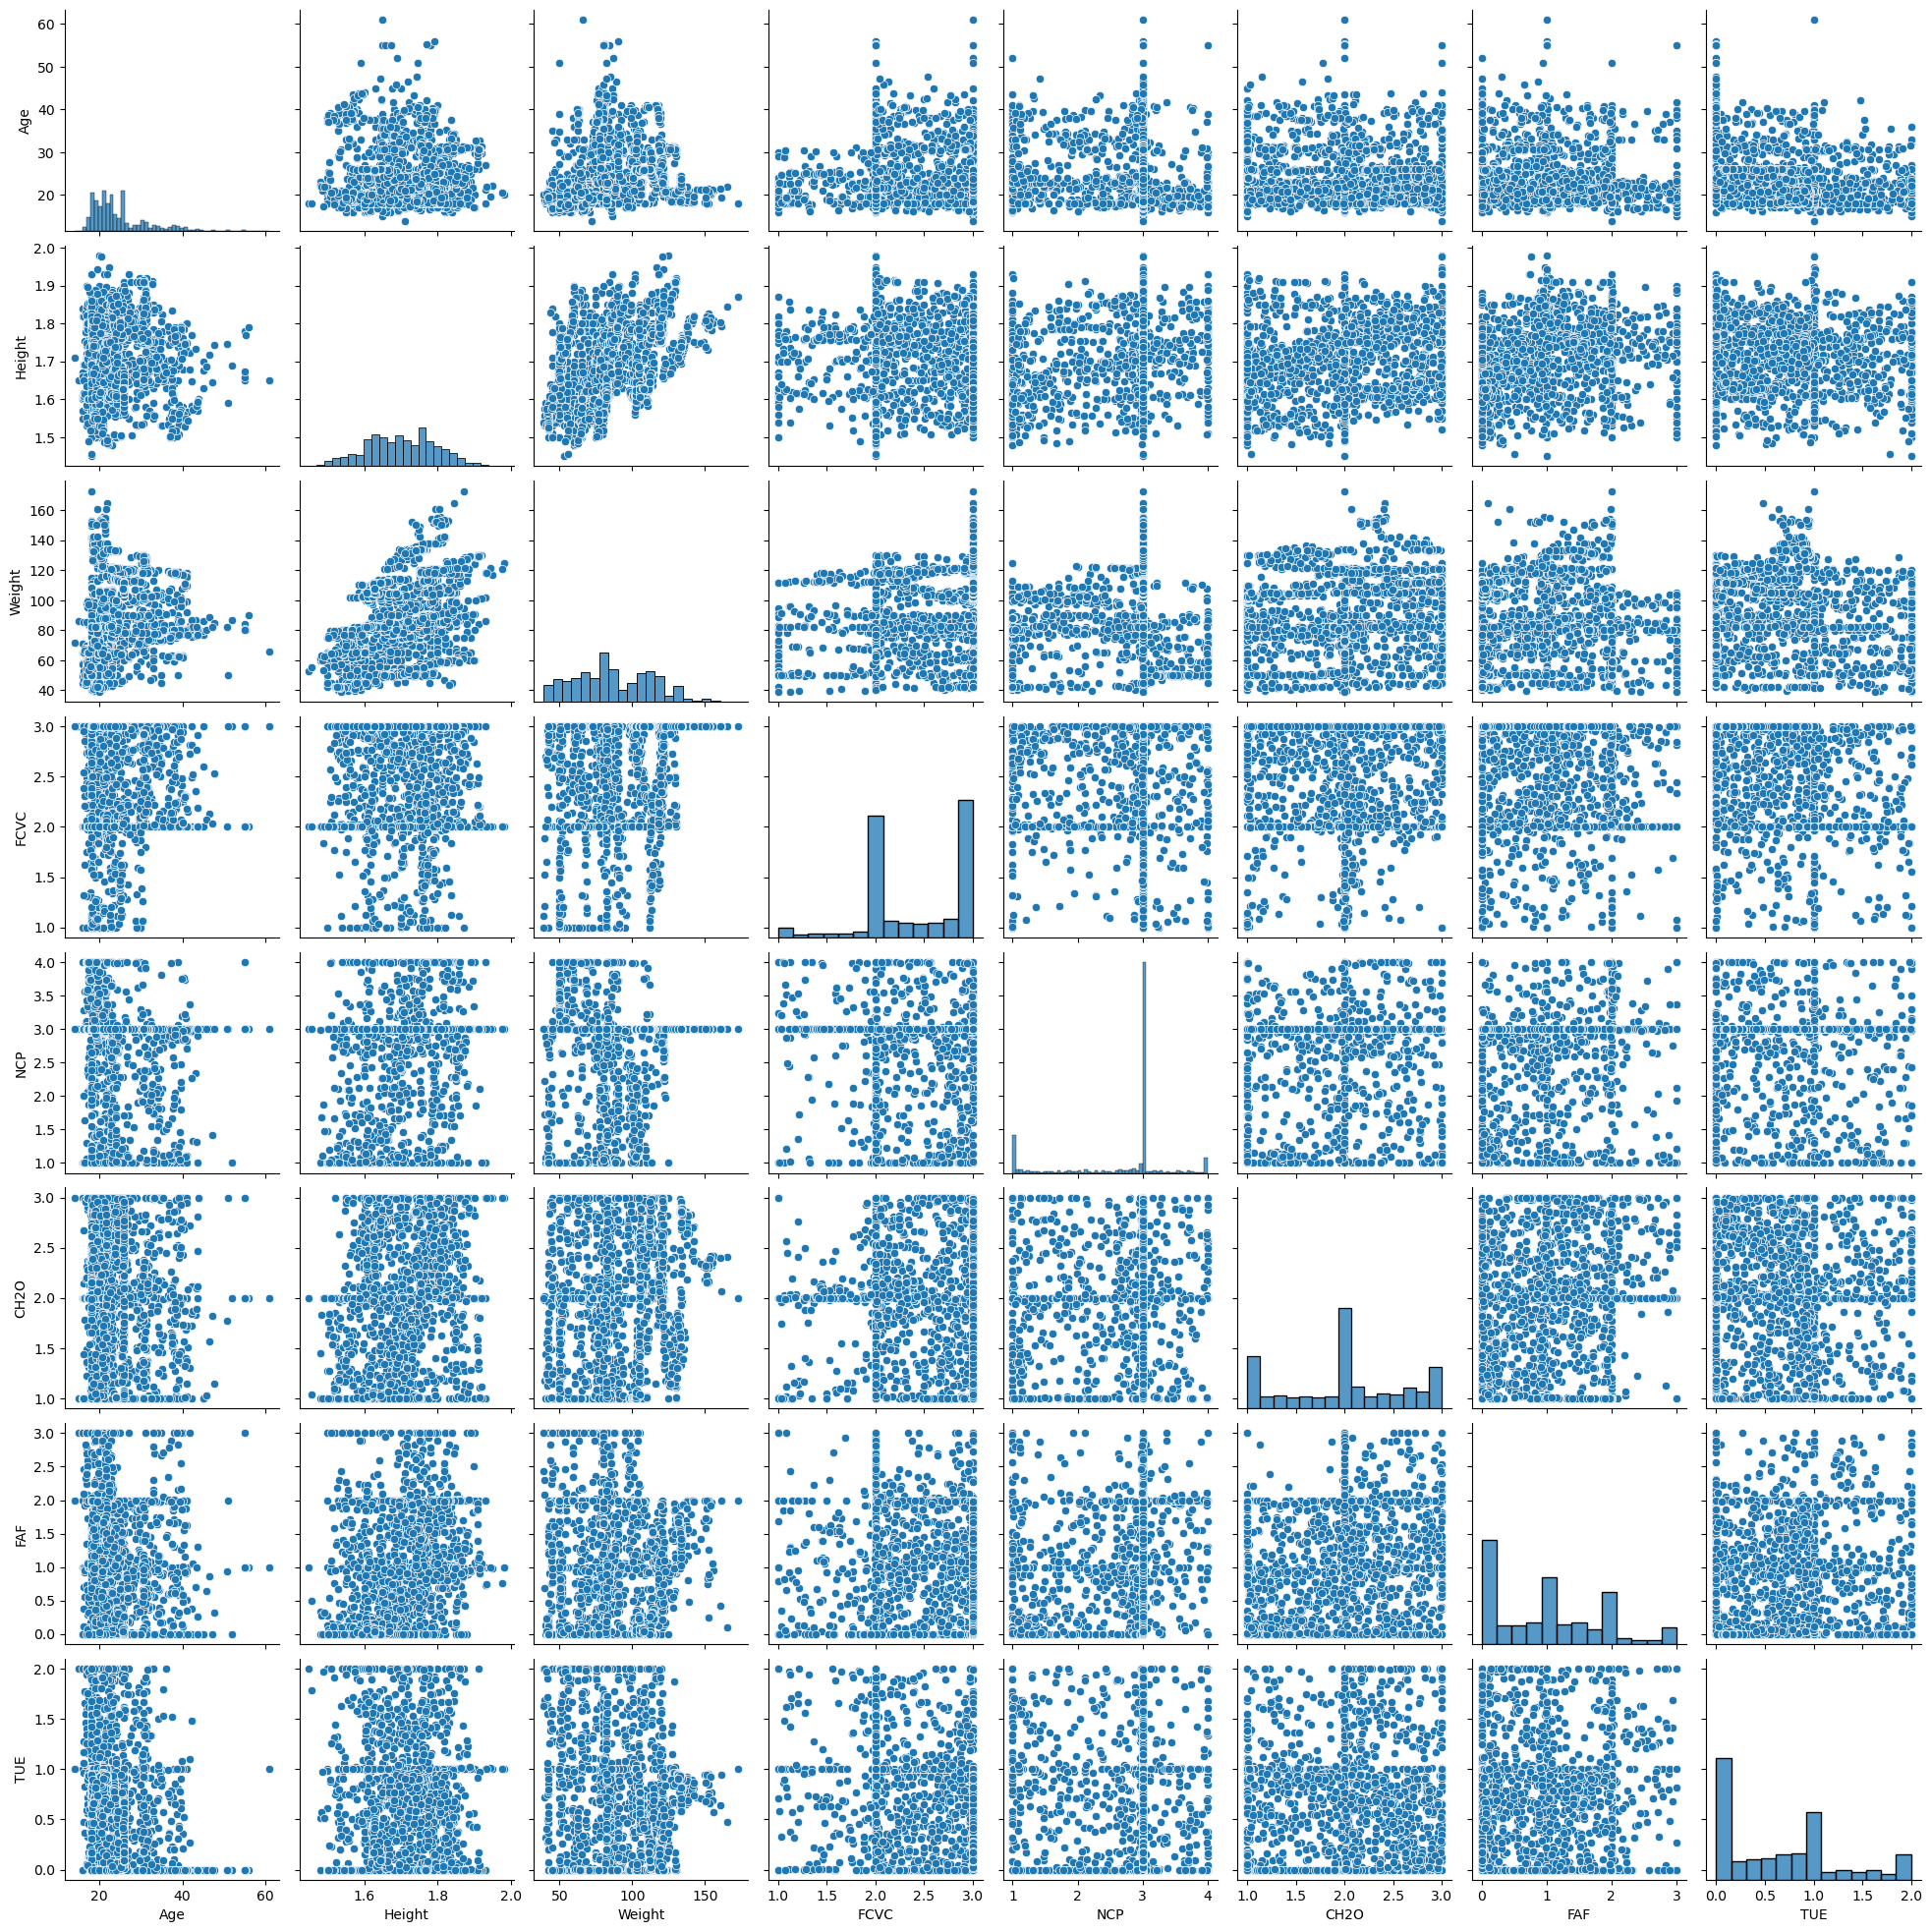

In [80]:
# CONSTRUCTING PAIRPLOTS TO VISUALIZE RELATIONSHIPS BETWEEN NUMERICAL FEATURES

sns.pairplot(df_obesity)
plt.show()

#### INSIGHTS

Text

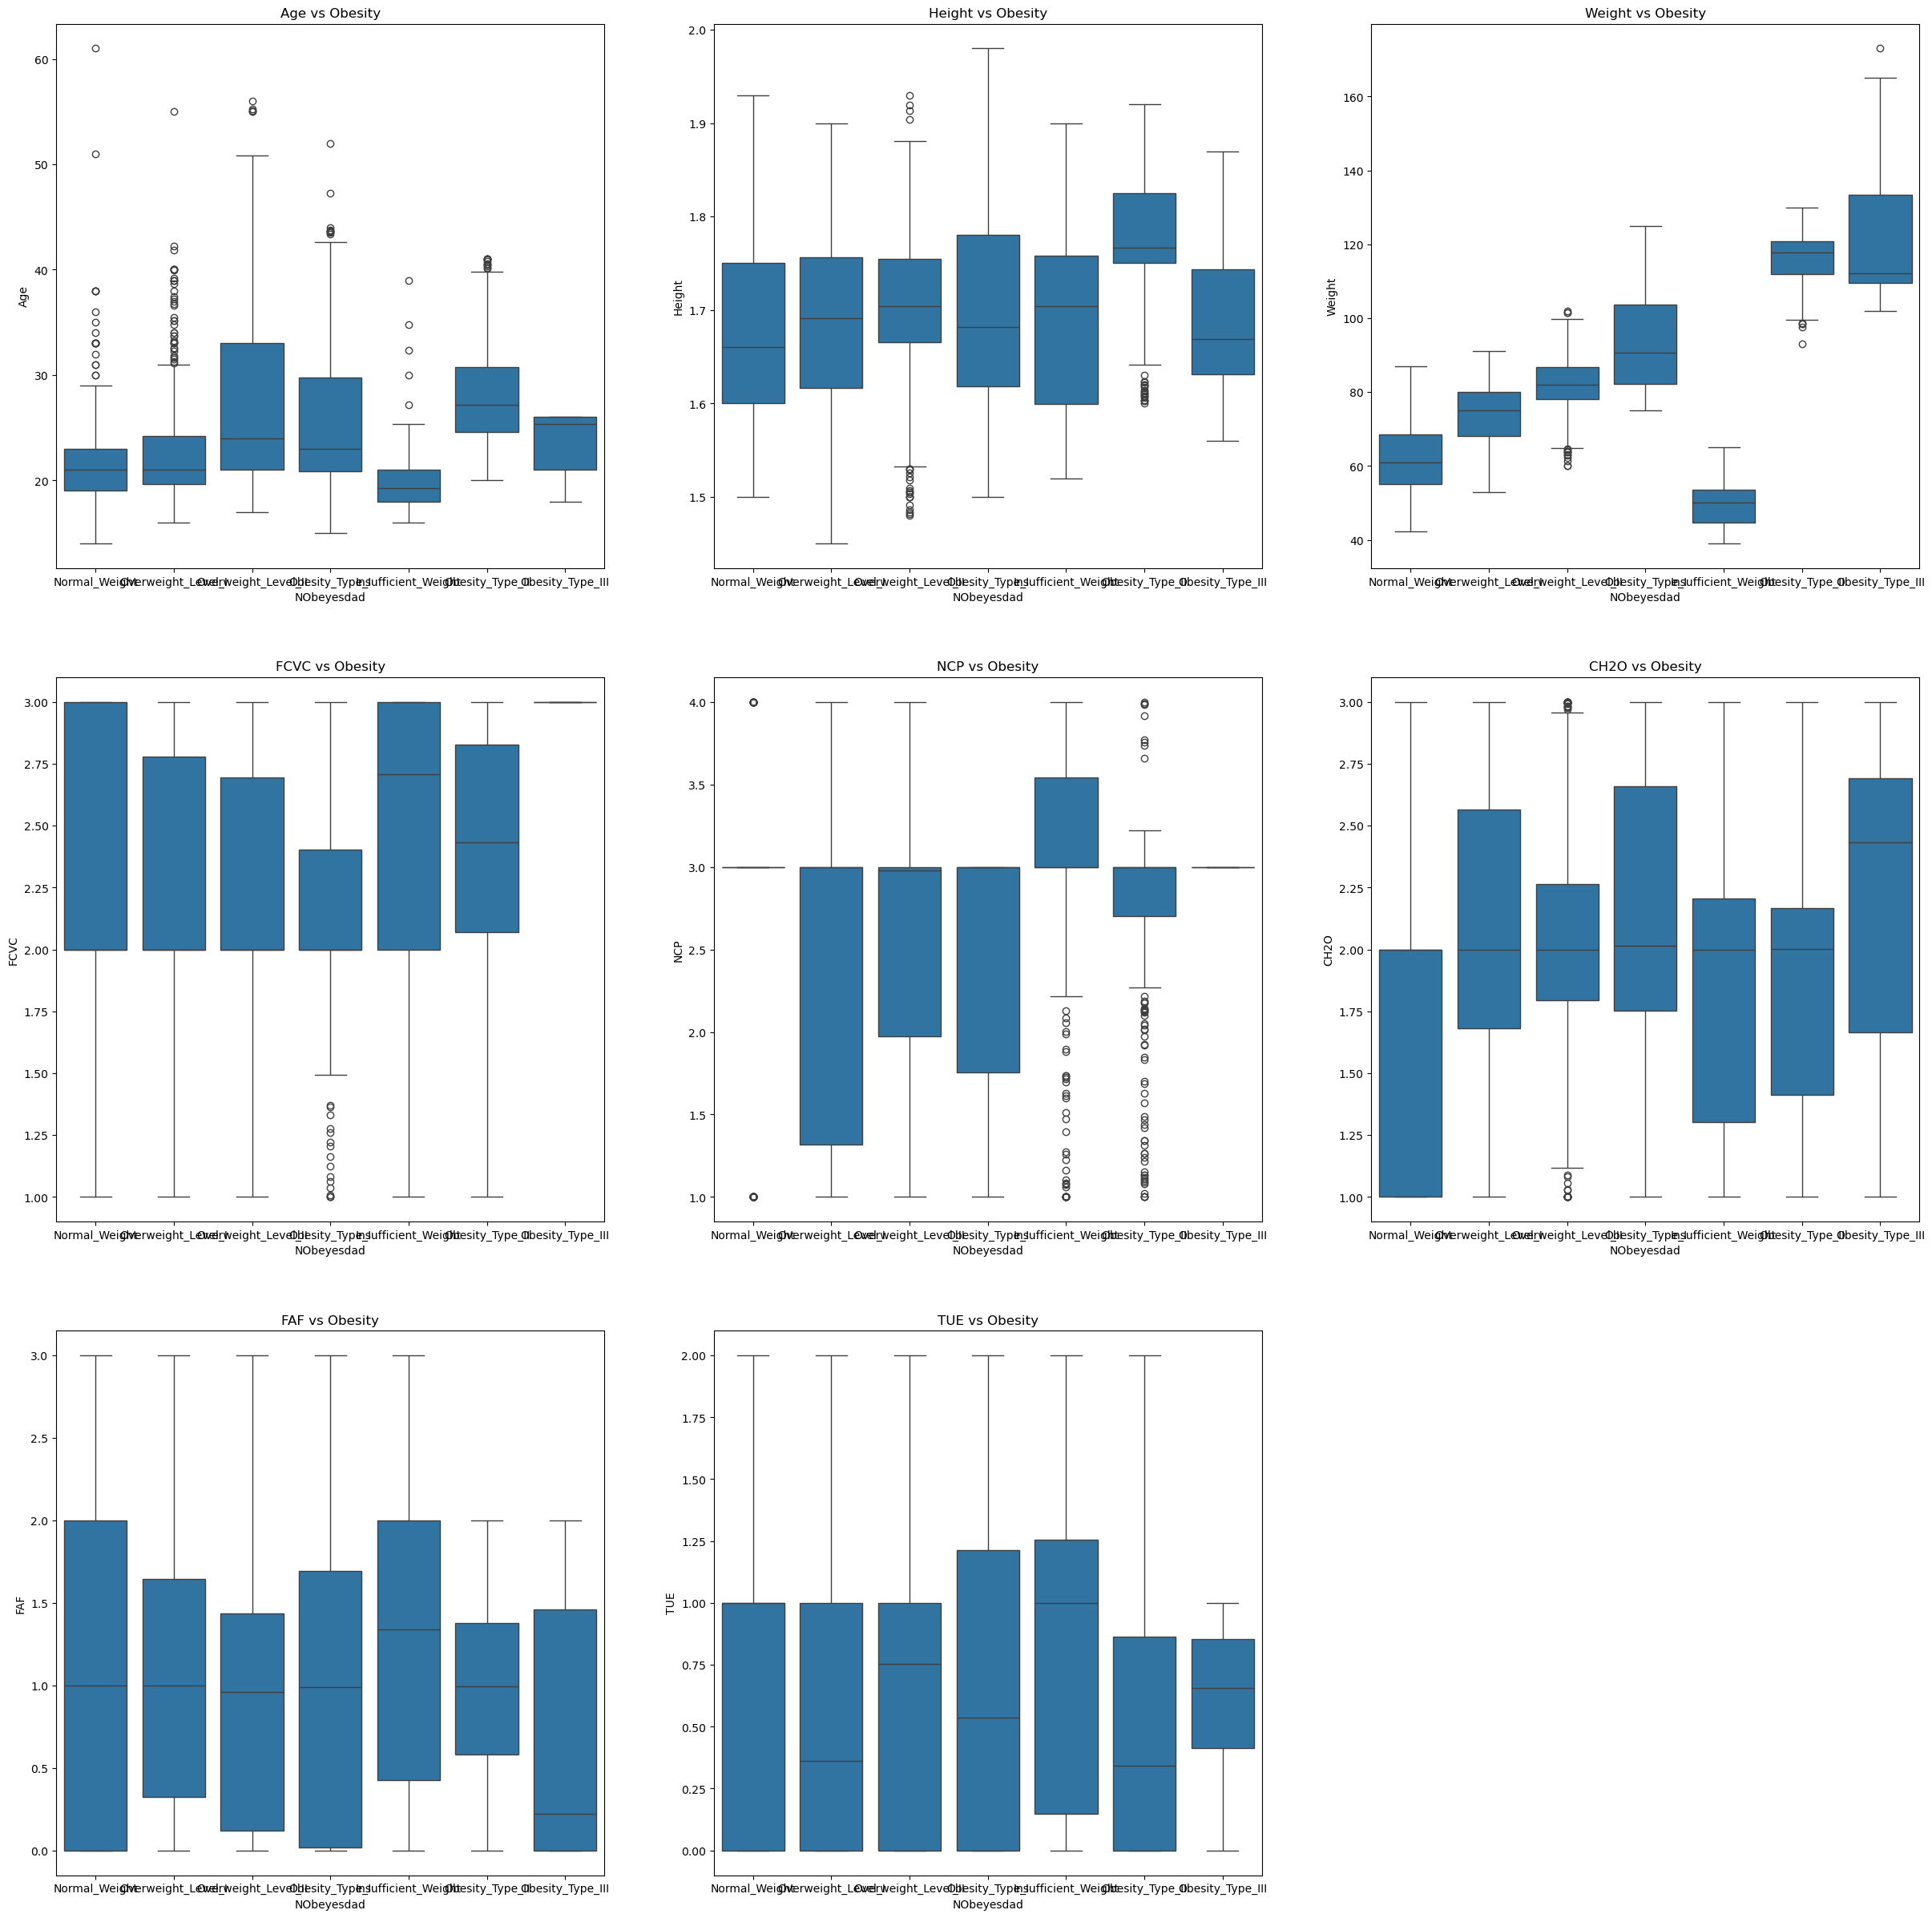

In [81]:
# CONSTRUCTING BOXPLOTS TO VISUALIZE NUMERICAL FEATURES VS. TARGET FEATURE

plt.figure(figsize=(30, 30))
for i, col in enumerate(float64_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_obesity, x='NObeyesdad', y=col)
    plt.title(f'{col} vs Obesity')
#plt.tight_layout()
plt.show()

#### INSIGHTS

Text

### ANALYZING CATEGORICAL FEATURES

In [75]:
# LIST OF COLUMNS WITH CATEGORICAL DATA

object_columns = df_obesity.select_dtypes(include='object').columns
object_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [77]:
# DESCRIPTIVE STATISTICS

df_obesity.describe(include=object)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [78]:
# IDENTIFYING UNIQUE VALUES FOR EACH OBJECT COLUMN

for col in object_columns:
    unique_values = df_obesity[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Gender':
['Female' 'Male']


Unique values in column 'family_history_with_overweight':
['yes' 'no']


Unique values in column 'FAVC':
['no' 'yes']


Unique values in column 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']


Unique values in column 'SMOKE':
['no' 'yes']


Unique values in column 'SCC':
['no' 'yes']


Unique values in column 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']


Unique values in column 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


Unique values in column 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




In [82]:
# ONE-HOT ENCODING OF CATEGORICAL FEATURES

df_encoded = pd.get_dummies(df_obesity, columns=object_columns, drop_first=True)
df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,False,True,...,False,False,True,False,True,False,False,False,False,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,False,True,...,False,False,True,False,True,False,False,False,False,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,True,True,...,False,False,True,False,True,False,False,False,False,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,True,False,...,False,False,False,True,False,False,False,False,True,False
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,True,False,...,False,False,True,False,False,False,False,False,False,True


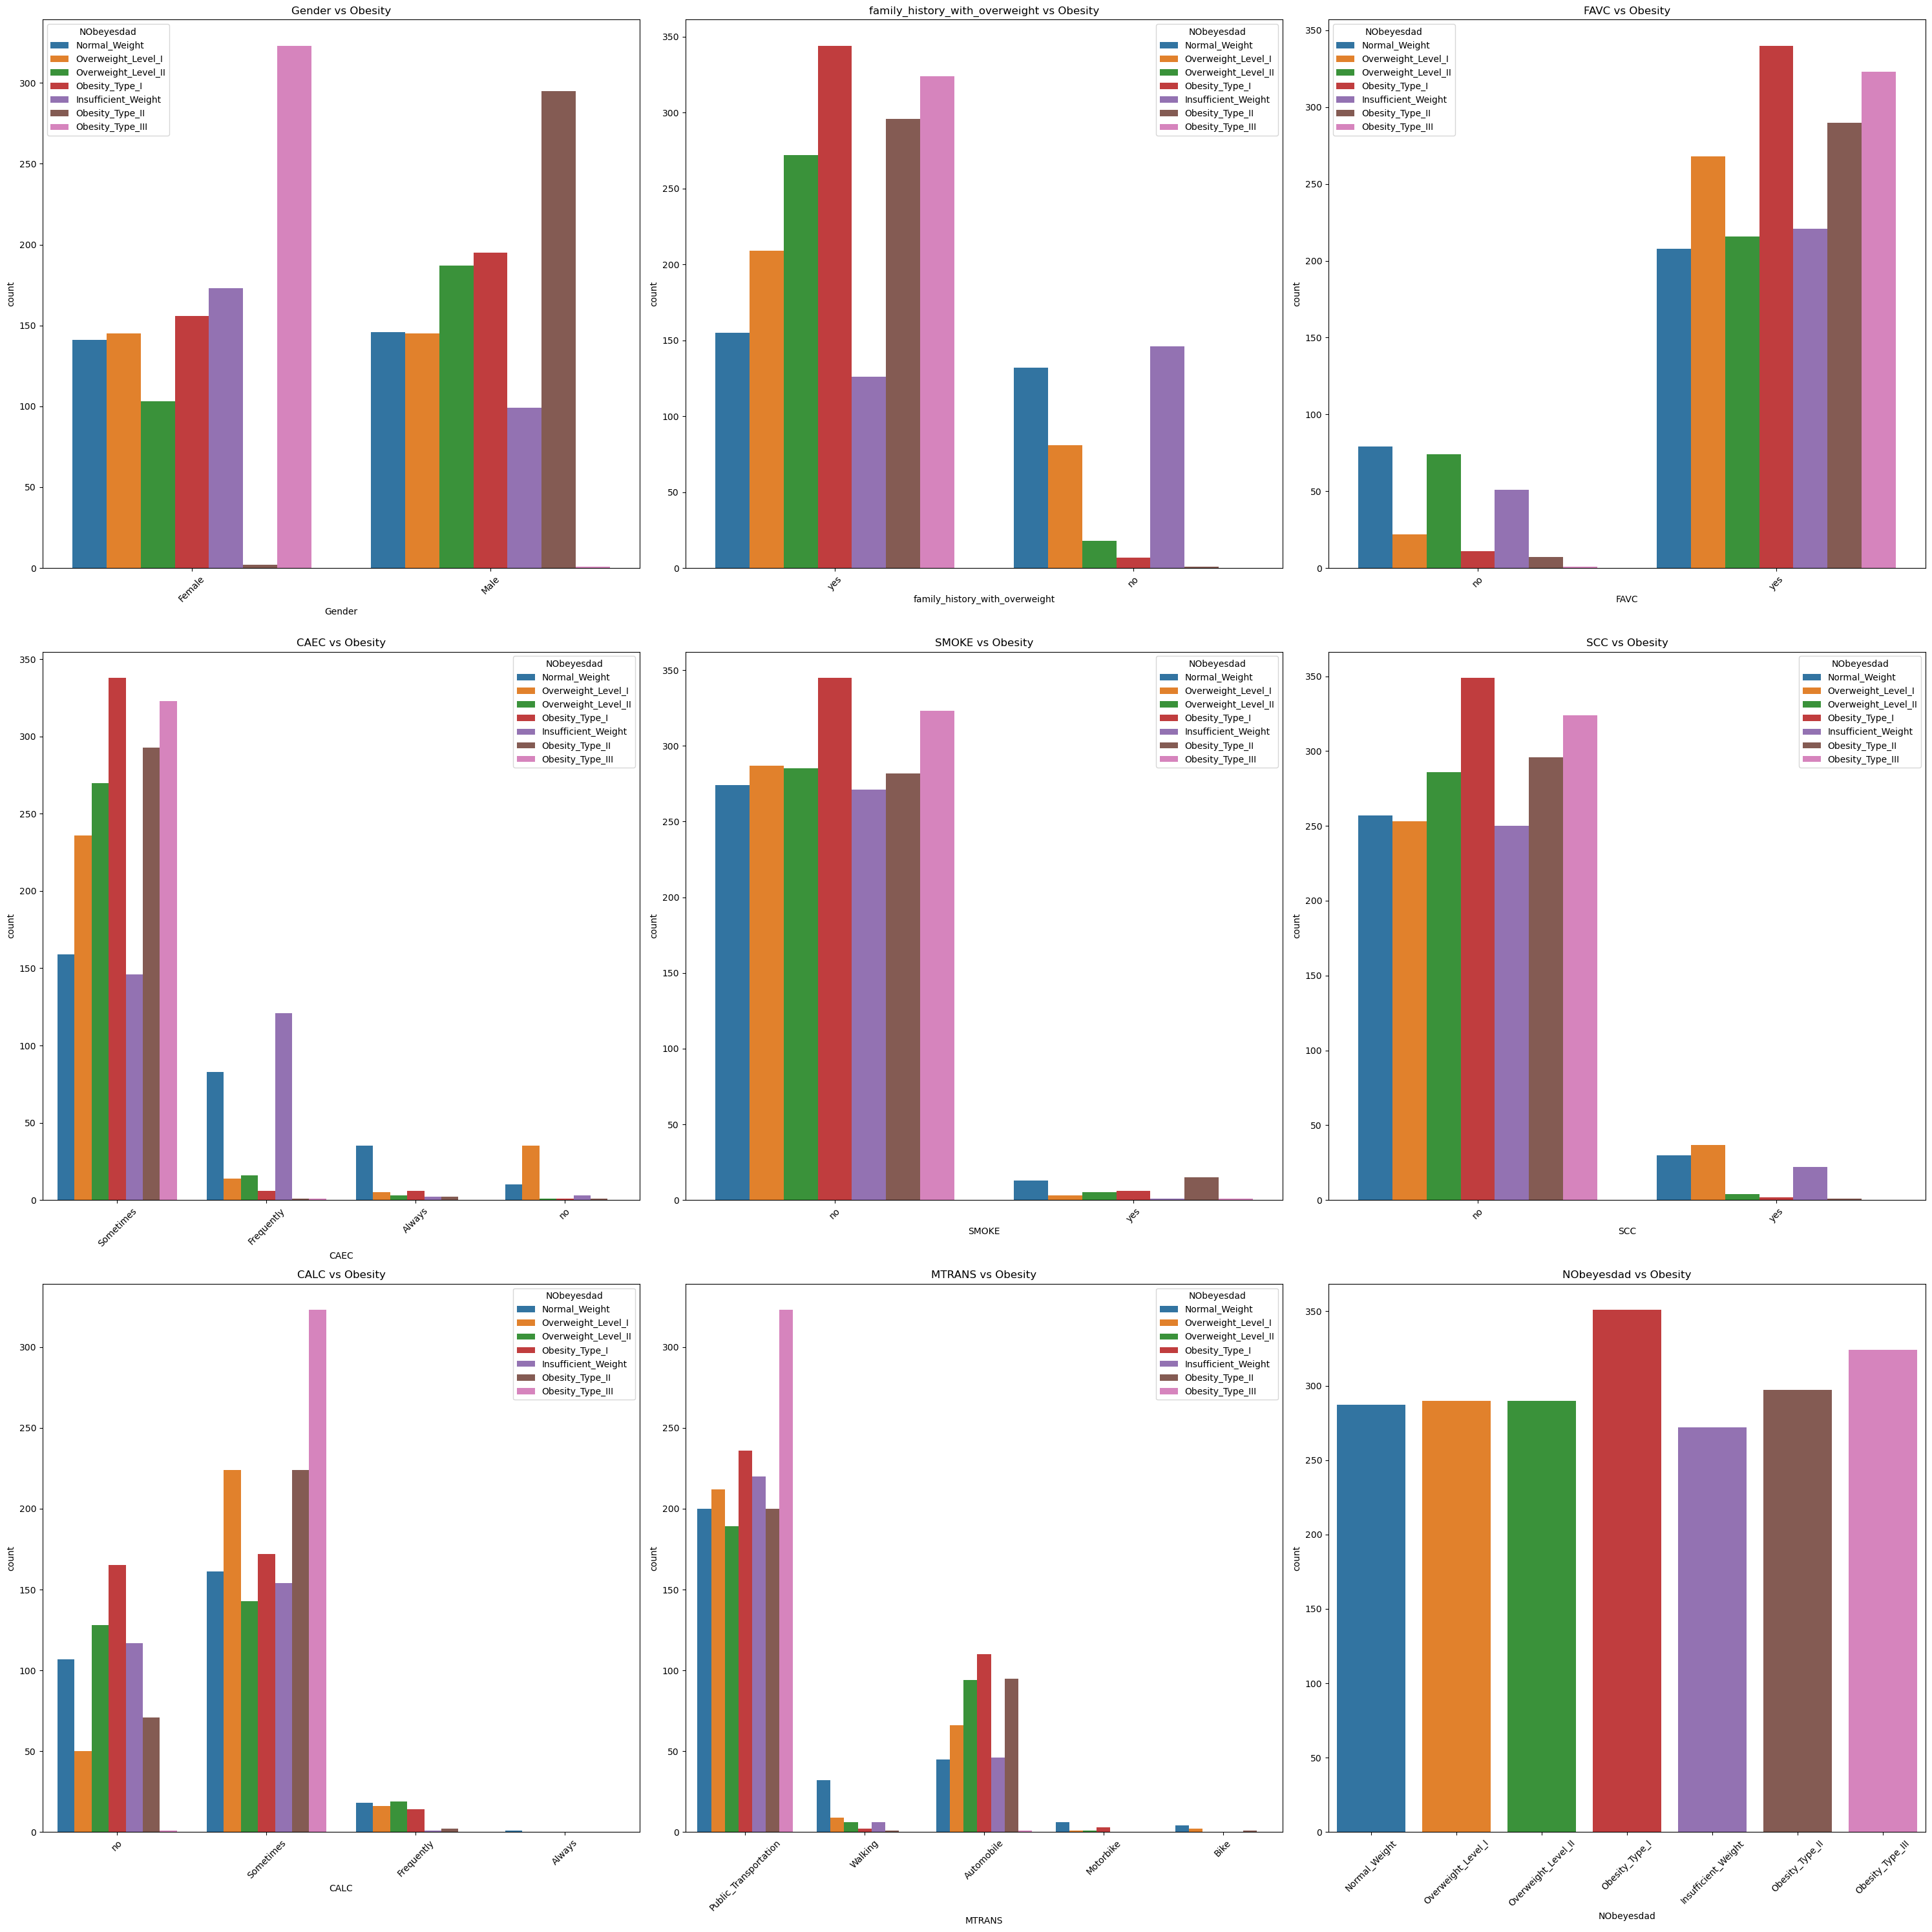

In [83]:
# CONSTRUCTING BOXPLOTS TO VISUALIZE CATEGORICAL FEATURES VS. TARGET FEATURE

plt.figure(figsize=(30, 30))
for i, col in enumerate(object_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_obesity, x=col, hue='NObeyesdad')
    plt.title(f'{col} vs Obesity')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

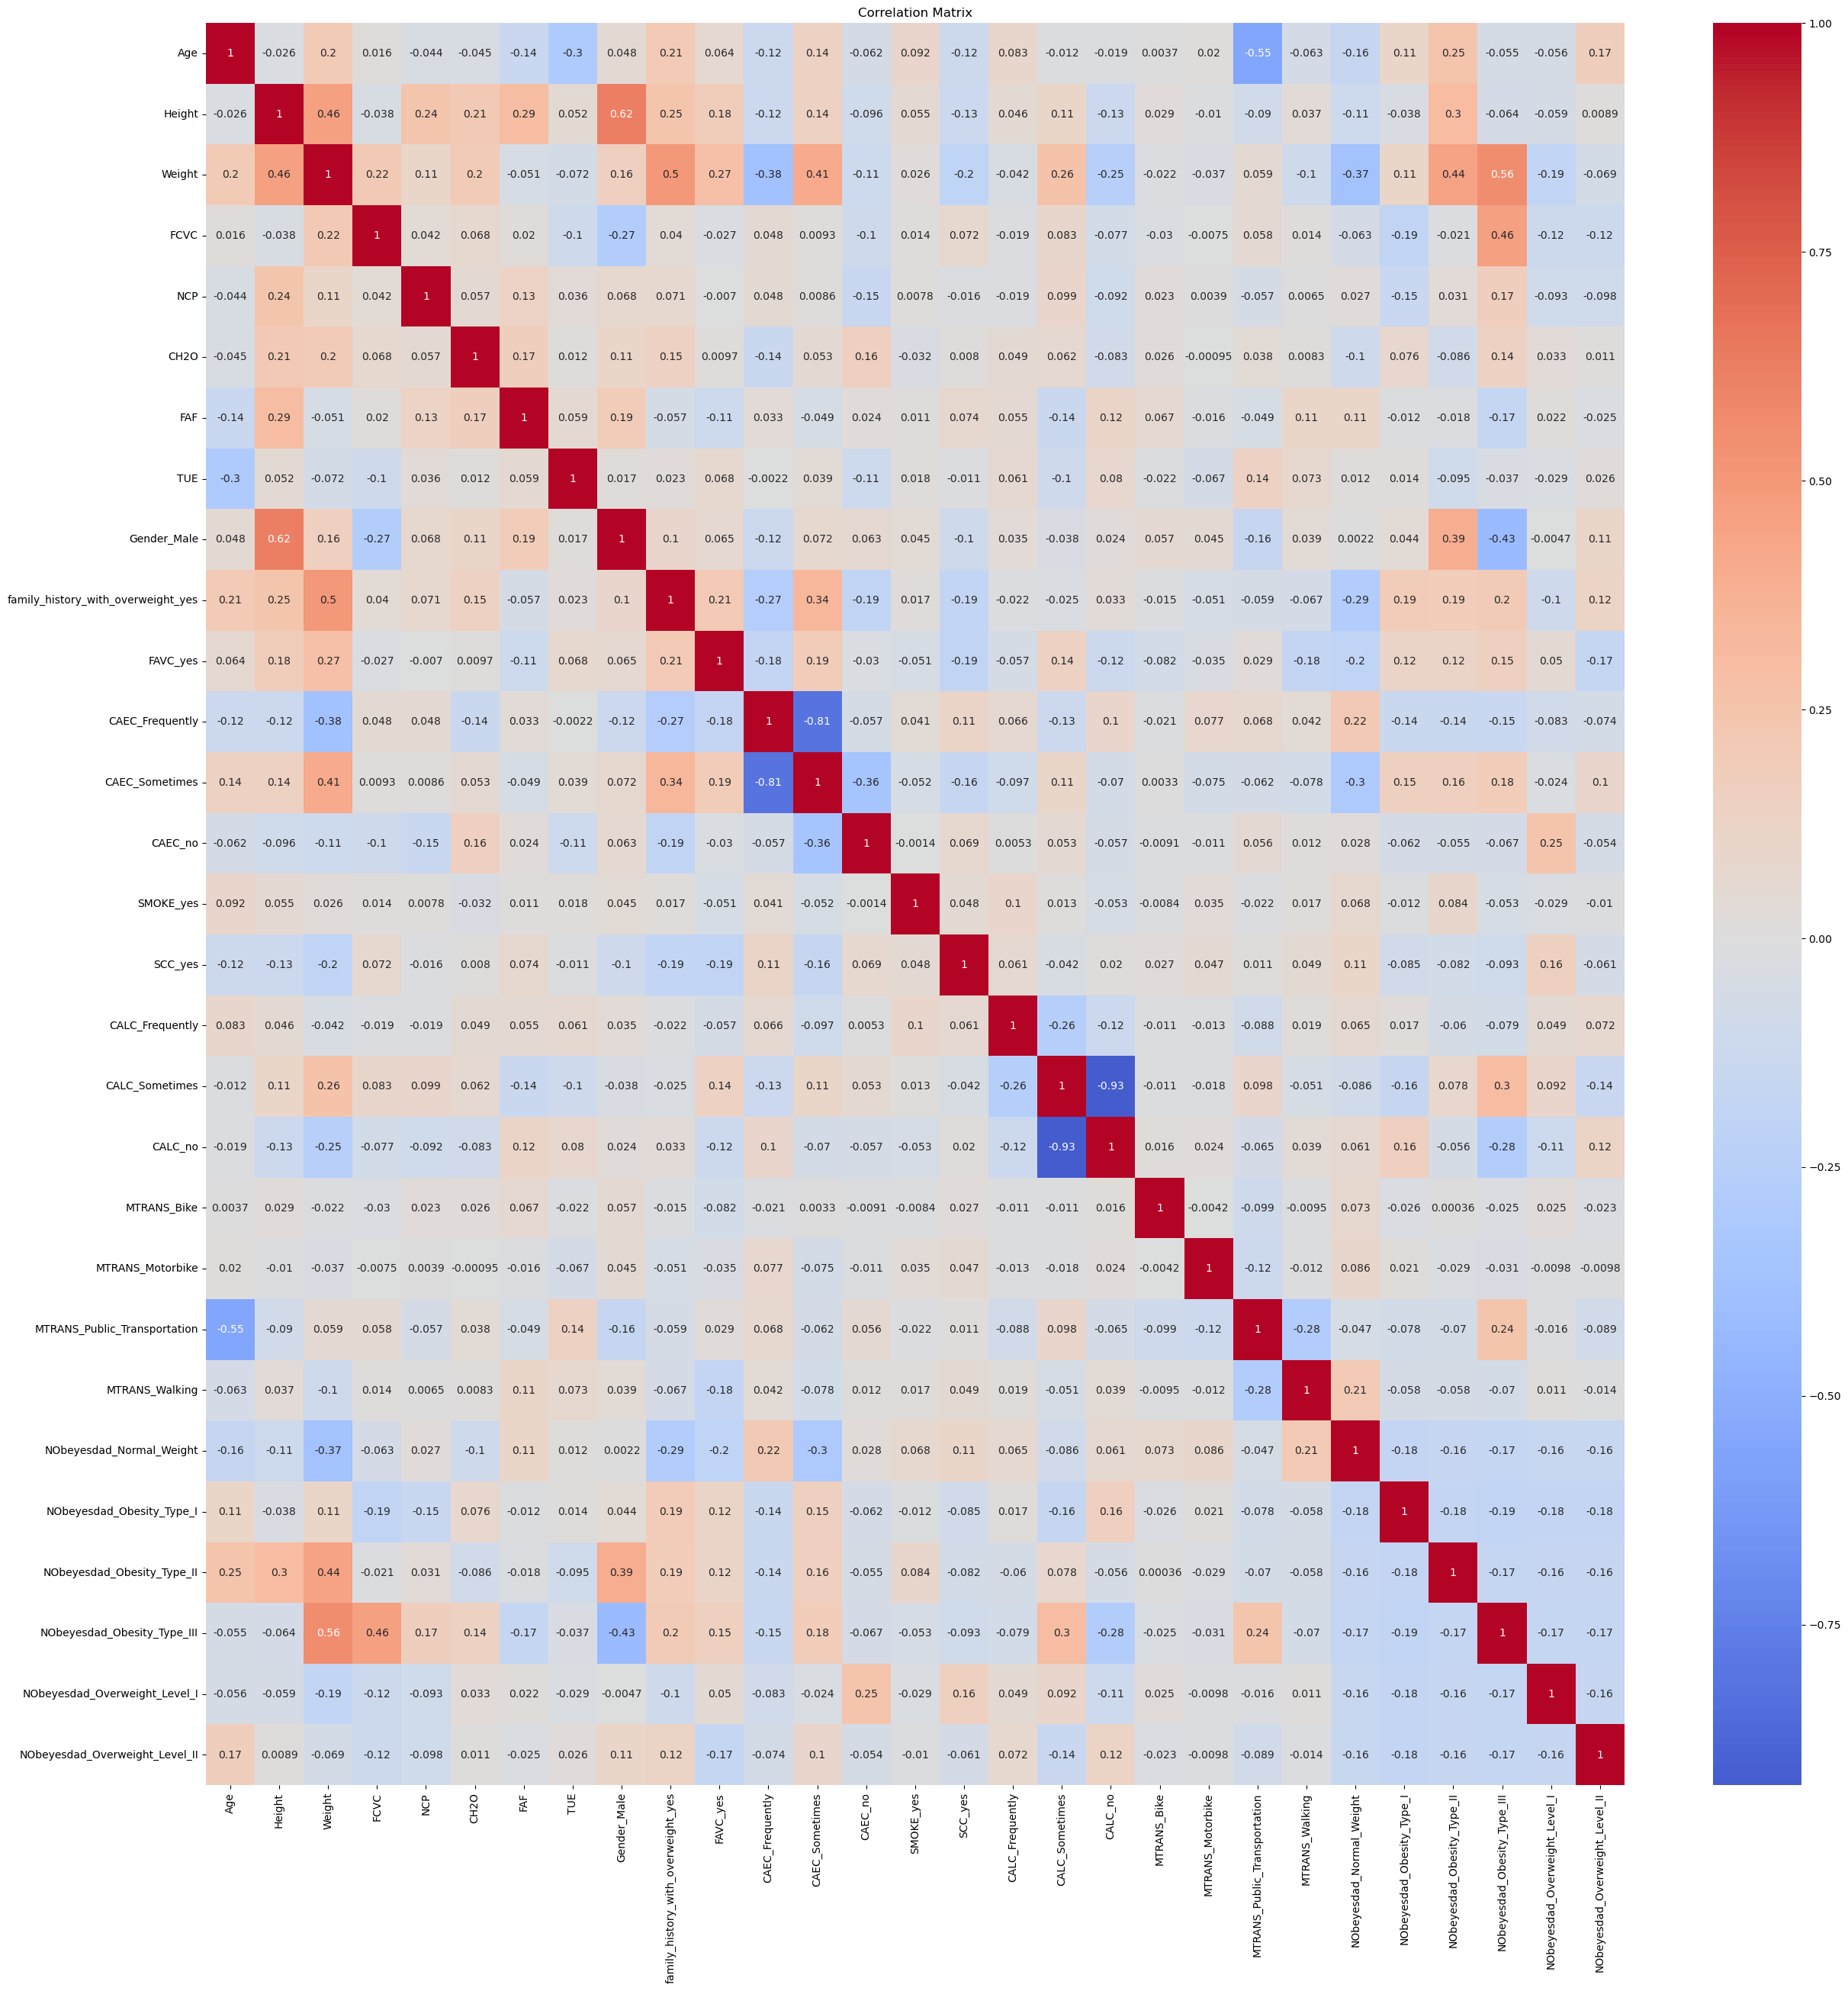

In [84]:
# CALCULATING AND VISUALIZING CORRELATION MATRIX OF NUMERICAL VARIABLES AND ONE-HOT ENCODED CATEGORICAL FEATURES

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()